In [1]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg')

In [2]:
census=pd.read_csv('data/acs2015_county_data.csv')
census.head()

,CensusId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,1001,Alabama,Autauga,55221,26745,28476,2.6,75.8,18.5,0.4,...,0.5,1.3,1.8,26.5,23986,73.6,20.9,5.5,0.0,7.6
1,1003,Alabama,Baldwin,195121,95314,99807,4.5,83.1,9.5,0.6,...,1.0,1.4,3.9,26.4,85953,81.5,12.3,5.8,0.4,7.5
2,1005,Alabama,Barbour,26932,14497,12435,4.6,46.2,46.7,0.2,...,1.8,1.5,1.6,24.1,8597,71.8,20.8,7.3,0.1,17.6
3,1007,Alabama,Bibb,22604,12073,10531,2.2,74.5,21.4,0.4,...,0.6,1.5,0.7,28.8,8294,76.8,16.1,6.7,0.4,8.3
4,1009,Alabama,Blount,57710,28512,29198,8.6,87.9,1.5,0.3,...,0.9,0.4,2.3,34.9,22189,82.0,13.5,4.2,0.4,7.7


In [3]:
census.isnull().sum(axis=0)

CensusId           0
State              0
County             0
TotalPop           0
Men                0
Women              0
Hispanic           0
White              0
Black              0
Native             0
Asian              0
Pacific            0
Citizen            0
Income             1
IncomeErr          1
IncomePerCap       0
IncomePerCapErr    0
Poverty            0
ChildPoverty       1
Professional       0
Service            0
Office             0
Construction       0
Production         0
Drive              0
Carpool            0
Transit            0
Walk               0
OtherTransp        0
WorkAtHome         0
MeanCommute        0
Employed           0
PrivateWork        0
PublicWork         0
SelfEmployed       0
FamilyWork         0
Unemployment       0
dtype: int64

In [4]:
census=census.dropna()

In [5]:
cols=[c for c in census.columns.values if c not in ['CensusId', 'State', 'County']]

# K-Means

In [6]:
from sklearn.cluster import KMeans

In [7]:
kmeans=KMeans(n_clusters=4)

clusters=kmeans.fit(census[cols])

In [10]:
clusters.cluster_centers_[0]

array([4.86137678e+04, 2.40621967e+04, 2.45515711e+04, 1.05567434e+01,
       7.64794408e+01, 8.35263158e+00, 1.80161184e+00, 9.32302632e-01,
       6.60197368e-02, 3.59949480e+04, 4.52585901e+04, 2.96736349e+03,
       2.35332332e+04, 1.41598651e+03, 1.76663816e+01, 2.44105263e+01,
       3.05263158e+01, 1.83702632e+01, 2.20742434e+01, 1.29949671e+01,
       1.60345066e+01, 7.94196711e+01, 1.03449342e+01, 6.61085526e-01,
       3.34588816e+00, 1.59351974e+00, 4.63578947e+00, 2.30830263e+01,
       2.15065523e+04, 7.38485197e+01, 1.77832895e+01, 8.07098684e+00,
       2.97006579e-01, 8.08003289e+00])

In [11]:
len(clusters.cluster_centers_)

4

In [17]:
preds=clusters.fit_predict(census[cols])
preds

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [19]:
distancias=clusters.fit_transform(census[cols])
distancias[0]

array([9.96438206e+05, 1.08771054e+04, 1.43820788e+07, 3.69620918e+06])

In [20]:
import numpy as np
# distancias desde el cluster 1

distancias[np.where(preds==1)[0]]

array([[ 4804605.31745871,  5809503.89979835,  8588496.98197191,
         2106406.00976323],
       [ 3470957.88908917,  4475286.97640161,  9917118.44212282,
          772570.30820241],
       [ 2211780.64503106,  3214056.93876303, 11180977.9607949 ,
          513144.88932824],
       [ 1915071.10096707,  2916768.67305135, 11478171.47094131,
          803143.61151026],
       [ 3644726.06456511,  4649578.65598336,  9747031.09016275,
          949401.92658742],
       [ 1636262.80140573,  2638966.3041424 , 11753365.28587231,
         1071684.93830065],
       [ 1633155.31804387,  2637934.82275924, 11754836.98165016,
         1068460.78265703],
       [ 2695633.70843222,  3697275.8797743 , 10694584.7804203 ,
          142440.43241204],
       [ 6632496.86110559,  7637613.22809512,  6766975.69819643,
         3934192.92636933],
       [ 1550150.83149654,  2551761.67223661, 11853030.30945281,
         1178691.48062282],
       [ 1890837.41503965,  2895275.90862036, 11497340.39330611,
     

In [21]:
census['cluster']=preds
census.head()

,CensusId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment,cluster
0,1001,Alabama,Autauga,55221,26745,28476,2.6,75.8,18.5,0.4,...,1.3,1.8,26.5,23986,73.6,20.9,5.5,0.0,7.6,0
1,1003,Alabama,Baldwin,195121,95314,99807,4.5,83.1,9.5,0.6,...,1.4,3.9,26.4,85953,81.5,12.3,5.8,0.4,7.5,0
2,1005,Alabama,Barbour,26932,14497,12435,4.6,46.2,46.7,0.2,...,1.5,1.6,24.1,8597,71.8,20.8,7.3,0.1,17.6,0
3,1007,Alabama,Bibb,22604,12073,10531,2.2,74.5,21.4,0.4,...,1.5,0.7,28.8,8294,76.8,16.1,6.7,0.4,8.3,0
4,1009,Alabama,Blount,57710,28512,29198,8.6,87.9,1.5,0.3,...,0.4,2.3,34.9,22189,82.0,13.5,4.2,0.4,7.7,0


In [23]:
census[census.cluster==2].head()

,CensusId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment,cluster
36,1073,Alabama,Jefferson,659026,311581,347445,3.8,51.0,42.2,0.2,...,1.0,2.5,23.6,293202,80.9,14.4,4.6,0.2,9.1,2
48,1097,Alabama,Mobile,414251,198216,216035,2.6,58.1,35.0,0.6,...,0.8,3.7,24.4,170900,81.4,13.8,4.6,0.1,9.8,2
106,4019,Arizona,Pima,998537,491108,507429,35.7,53.7,3.3,2.4,...,3.7,4.6,24.4,422371,74.9,18.3,6.6,0.2,10.0,2
170,5119,Arkansas,Pulaski,390463,187292,203171,5.9,54.2,35.4,0.3,...,1.1,2.9,20.3,180430,74.6,20.6,4.7,0.2,7.5,2
186,6001,California,Alameda,1584983,776699,808284,22.6,33.0,11.3,0.3,...,3.5,5.6,30.7,778132,78.7,13.8,7.4,0.1,8.3,2


In [24]:
census[census.cluster==0].State.value_counts()

Texas             240
Georgia           155
Virginia          130
Kentucky          119
Missouri          112
Kansas            103
Iowa               98
Illinois           97
North Carolina     97
Tennessee          92
Nebraska           92
Indiana            90
Minnesota          84
Mississippi        82
Ohio               81
Michigan           78
Puerto Rico        78
Oklahoma           75
Arkansas           74
Wisconsin          69
South Dakota       66
Alabama            65
Louisiana          61
Colorado           59
Pennsylvania       58
Montana            56
West Virginia      55
Florida            53
North Dakota       53
New York           51
Idaho              43
South Carolina     43
California         37
Washington         34
Oregon             33
New Mexico         32
Alaska             29
Utah               27
Wyoming            23
Maryland           19
Maine              16
Nevada             15
Vermont            14
Arizona            13
New Jersey         10
New Hampsh

In [25]:
census.groupby(['cluster'])['Income'].mean()

cluster
0    45258.590132
1    58589.894737
2    61204.303797
3    56196.000000
Name: Income, dtype: float64

# Hierchical Clustering

In [26]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [28]:
np.set_printoptions(precision=5, suppress=True)

In [29]:
np.random.seed(4711)

a=np.random.multivariate_normal([10,0], [[3,1], [1,4]], size=[100,])
b=np.random.multivariate_normal([0,20], [[3,1], [1,4]], size=[50,])

In [30]:
X=np.concatenate((a,b),)
X.shape

(150, 2)

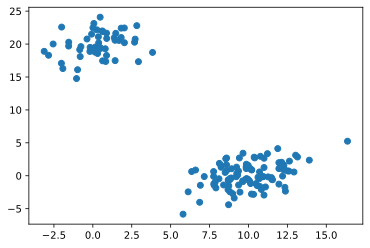

In [31]:
plt.scatter(X[:,0], X[:,1])
plt.show();

In [32]:
# matriz de conexion

Z=linkage(X, 'ward')
Z.shape

(149, 4)

In [33]:
Z[0]  # idx1, idx2, dist, sample_count

array([52.     , 53.     ,  0.04151,  2.     ])

In [34]:
Z[:20]

array([[ 52.     ,  53.     ,   0.04151,   2.     ],
       [ 14.     ,  79.     ,   0.05914,   2.     ],
       [ 33.     ,  68.     ,   0.07107,   2.     ],
       [ 17.     ,  73.     ,   0.07137,   2.     ],
       [  1.     ,   8.     ,   0.07543,   2.     ],
       [ 85.     ,  95.     ,   0.10928,   2.     ],
       [108.     , 131.     ,   0.11007,   2.     ],
       [  9.     ,  66.     ,   0.11302,   2.     ],
       [ 15.     ,  69.     ,   0.11429,   2.     ],
       [ 63.     ,  98.     ,   0.1212 ,   2.     ],
       [107.     , 115.     ,   0.12167,   2.     ],
       [ 65.     ,  74.     ,   0.1249 ,   2.     ],
       [ 58.     ,  61.     ,   0.14028,   2.     ],
       [ 62.     , 152.     ,   0.1726 ,   3.     ],
       [ 41.     , 158.     ,   0.1779 ,   3.     ],
       [ 10.     ,  83.     ,   0.18635,   2.     ],
       [114.     , 139.     ,   0.20419,   2.     ],
       [ 39.     ,  88.     ,   0.20628,   2.     ],
       [ 70.     ,  96.     ,   0.21931,   2. 

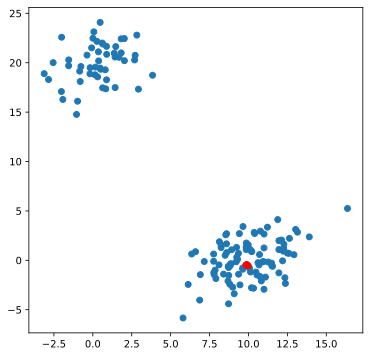

In [36]:
idxs=[33, 68, 62]

plt.figure(figsize=(6, 6))
plt.scatter(X[:,0], X[:,1])
plt.scatter(X[idxs,0], X[idxs,1], c='r')
plt.show();

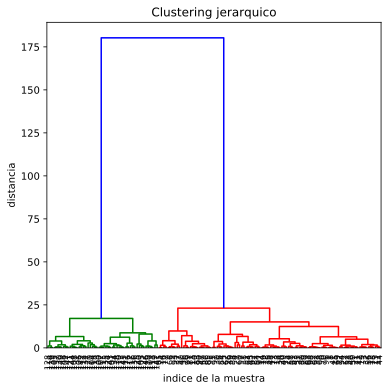

In [38]:
# dendrograma

plt.figure(figsize=(6,6))
plt.title('Clustering jerarquico')
plt.xlabel('indice de la muestra')
plt.ylabel('distancia')
dendrogram(Z, leaf_rotation=90., leaf_font_size=8.)
plt.show();

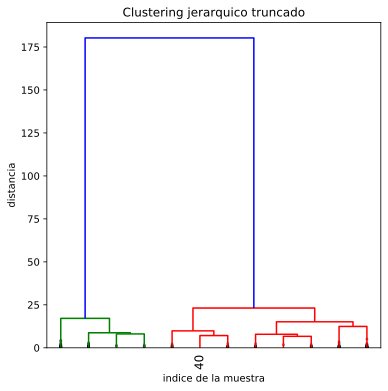

In [40]:
plt.figure(figsize=(6,6))
plt.title('Clustering jerarquico truncado')
plt.xlabel('indice de la muestra')
plt.ylabel('distancia')
dendrogram(Z, leaf_rotation=90., leaf_font_size=12.,truncate_mode='lastp',
           p=12, show_leaf_counts=False, show_contracted=True)
plt.show();

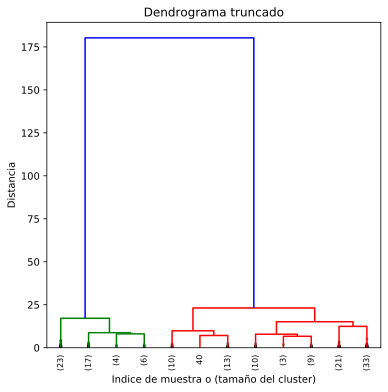

In [41]:
plt.figure(figsize=(6,6))
plt.title('Dendrograma truncado')
plt.xlabel('Indice de muestra o (tamaño del cluster)')
plt.ylabel('Distancia')
dendrogram(Z, truncate_mode='lastp', p=12,  
           leaf_rotation=90., leaf_font_size=8., show_contracted=True)
plt.show();

In [43]:
def fancy_dendro(*args, **kwargs):
    max_d=kwargs.pop('max_d', None)
    
    if max_d and 'color_threshold' not in kwargs:
        kwargs['color_threshold']=max_d
        
    annotate_above=kwargs.pop('annotate_above', None)
    
    ddata=dendrogram(*args, **kwargs)
    
    if not kwargs.get('no_plot', False):
        plt.title('Dendrograma')
        plt.xlabel('Indice de muestra o (tamaño del cluster)')
        plt.ylabel('Distancia')
        
        for i,d,c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
            x=0.5*sum(i[1:3])
            y=d[1]
            
            if y>annotate_above:
                plt.plot(x,y,'o', c=c)
                plt.annotate('%.3g'%y, (x,y), xytext=(0,-5),textcoords='offset points', va='top', ha='center')
                
        if max_d:
            plt.axhline(y=max_d, c='k')
    
    return ddata
    
    

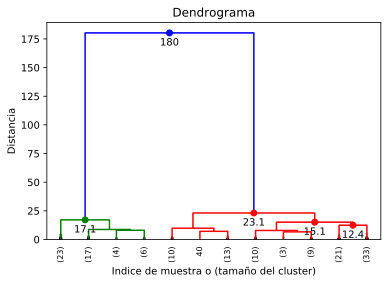

In [44]:
fancy_dendro(Z, truncate_mode='lastp', p=12, leaf_rotation=90., leaf_font_size=8.,
             show_contracted=True, annotate_above=10)
plt.show();

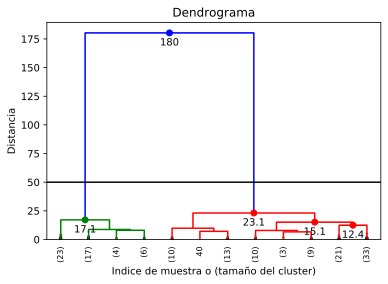

In [45]:
max_d=50

fancy_dendro(Z, truncate_mode='lastp', p=12, leaf_rotation=90., leaf_font_size=8.,
             show_contracted=True, annotate_above=10, max_d=max_d)
plt.show();

In [46]:
# obtener clusters

from scipy.cluster.hierarchy import fcluster

max_d=50
clusters=fcluster(Z, max_d, criterion='distance')
clusters

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [47]:
# si se conocen a priori el numero de clusters...

k=2
clusters_max=fcluster(Z, k, criterion='maxclust')
clusters_max

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

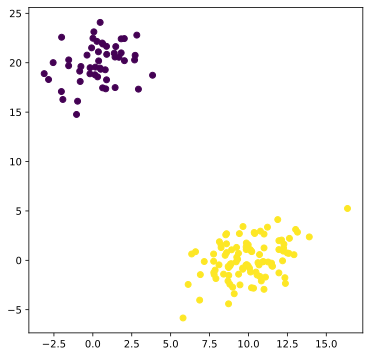

In [48]:
plt.figure(figsize=(6,6))
plt.scatter(X[:,0], X[:,1], c=clusters)
plt.show();

# K-Means VS Hierarchical

In [49]:
from sklearn.datasets import make_moons

In [50]:
moons=make_moons(n_samples=100, shuffle=True, noise=0.05)[0]

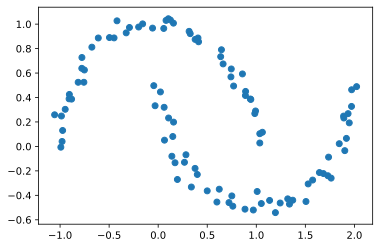

In [52]:
plt.scatter(moons[:,0], moons[:,1]);

In [53]:
from sklearn.cluster import AgglomerativeClustering as AC

In [54]:
cluster=AC().fit(moons)

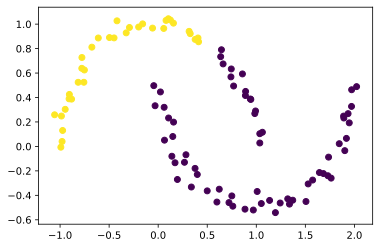

In [55]:
plt.scatter(moons[:,0], moons[:,1], c=cluster.labels_);

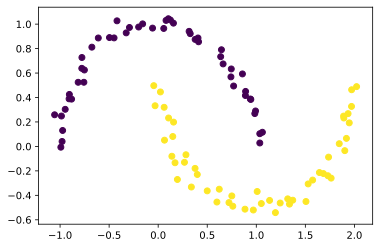

In [56]:
cluster=AC(linkage='single').fit(moons)
plt.scatter(moons[:,0], moons[:,1], c=cluster.labels_);

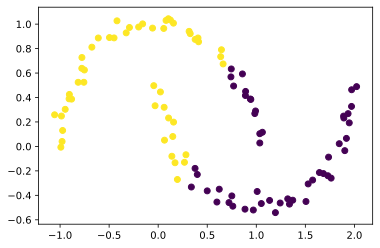

In [58]:
cluster=KMeans(n_clusters=2).fit(moons)
plt.scatter(moons[:,0], moons[:,1], c=cluster.labels_);

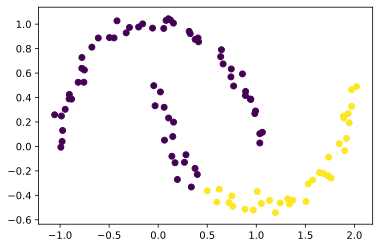

In [59]:
cluster=AC(linkage='complete').fit(moons)
plt.scatter(moons[:,0], moons[:,1], c=cluster.labels_);

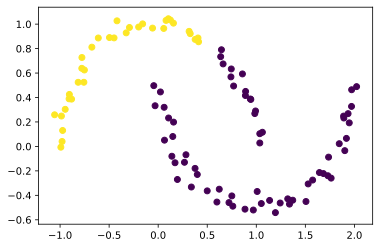

In [60]:
cluster=AC(linkage='average').fit(moons)
plt.scatter(moons[:,0], moons[:,1], c=cluster.labels_);